In [2]:
#!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [13]:
!pwd

/home/gom/Workspace/tf2/tf-coursera-practices


In [7]:
import zipfile

# Unzip the archive
local_zip = '../data/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [14]:
import os
base_dir = './data/cats_and_dogs_filtered'

print('Contents of base directory')
print(os.listdir(base_dir))

print('Contents of train directory')
print(os.listdir(f'{base_dir}/train'))

print('Contents of validation directory')
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory
['validation', 'train', 'vectorize.py']
Contents of train directory
['dogs', 'cats']
Contents of validation directory
['dogs', 'cats']


In [15]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [17]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.960.jpg', 'cat.999.jpg', 'cat.544.jpg', 'cat.28.jpg', 'cat.579.jpg', 'cat.174.jpg', 'cat.720.jpg', 'cat.648.jpg', 'cat.439.jpg', 'cat.258.jpg']
['dog.419.jpg', 'dog.675.jpg', 'dog.455.jpg', 'dog.153.jpg', 'dog.946.jpg', 'dog.149.jpg', 'dog.84.jpg', 'dog.513.jpg', 'dog.16.jpg', 'dog.663.jpg']


In [18]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir( validation_cats_dir)))
print('total validation dog images :', len(os.listdir( validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [19]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

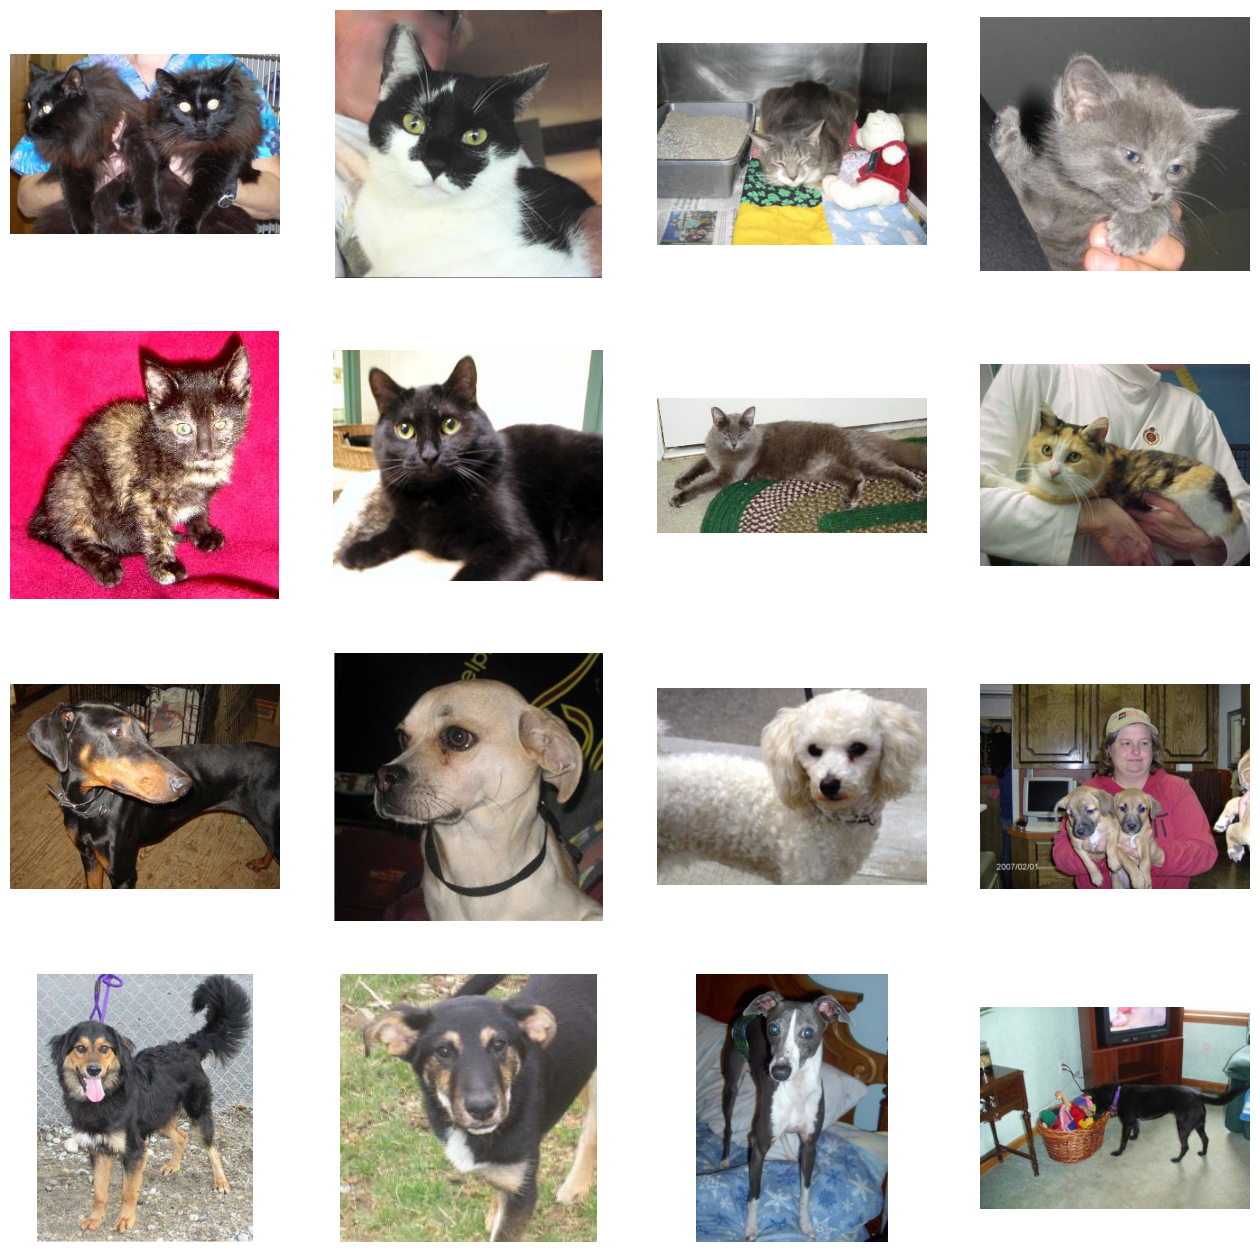

In [20]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [22]:
import tensorflow as tf

# Build a small model from scratch
model = tf.keras.models.Sequential([
    # Note the input shape is the desired of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Conv Layer
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Conv Layer
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # Dense Layer
    tf.keras.layers.Dense(512,activation='relu'),
    # Output Layer
    tf.keras.layers.Dense(1,activation='sigmoid')
])

2024-01-21 11:50:37.884543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-21 11:50:37.884703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-21 11:50:37.926929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-21 11:50:37.927071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-21 11:50:37.927168: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)       0

In [24]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1/255
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))


# Flow validation images in batches of 20 using validation_datagen generator
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
# Train model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=2
)

Epoch 1/15


2024-01-21 12:10:08.837634: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204
2024-01-21 12:10:10.533729: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


100/100 - 5s - loss: 0.7977 - accuracy: 0.5665 - val_loss: 0.7123 - val_accuracy: 0.5180 - 5s/epoch - 51ms/step
Epoch 2/15
100/100 - 2s - loss: 0.6427 - accuracy: 0.6580 - val_loss: 0.5785 - val_accuracy: 0.7070 - 2s/epoch - 20ms/step
Epoch 3/15
100/100 - 2s - loss: 0.5394 - accuracy: 0.7235 - val_loss: 0.5669 - val_accuracy: 0.7200 - 2s/epoch - 20ms/step
Epoch 4/15
100/100 - 2s - loss: 0.4622 - accuracy: 0.7780 - val_loss: 0.5493 - val_accuracy: 0.7260 - 2s/epoch - 20ms/step
Epoch 5/15
100/100 - 2s - loss: 0.3646 - accuracy: 0.8380 - val_loss: 0.5662 - val_accuracy: 0.7320 - 2s/epoch - 20ms/step
Epoch 6/15
100/100 - 2s - loss: 0.2579 - accuracy: 0.8950 - val_loss: 0.7248 - val_accuracy: 0.7290 - 2s/epoch - 20ms/step
Epoch 7/15
100/100 - 2s - loss: 0.1801 - accuracy: 0.9205 - val_loss: 0.8716 - val_accuracy: 0.7270 - 2s/epoch - 20ms/step
Epoch 8/15
100/100 - 2s - loss: 0.1088 - accuracy: 0.9585 - val_loss: 1.4833 - val_accuracy: 0.6900 - 2s/epoch - 20ms/step
Epoch 9/15
100/100 - 2s - l

In [53]:
import cv2
import random
import numpy as np
from tensorflow.keras.utils import img_to_array, load_img

./data/cats_and_dogs_filtered/train/cats/cat.59.jpg is a cat


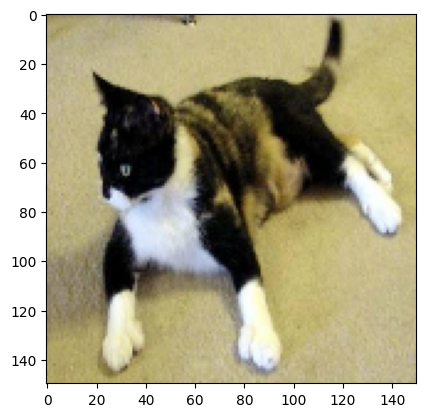

In [51]:
# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (150,150), interpolation = cv2.INTER_LINEAR)
x = img/255
x = np.expand_dims(x,axis=0)

pred = model.predict(x, batch_size=10)

if pred > 0.5:
    print(img_path + " is a dog")
else:
    print(img_path + " is a cat")

plt.imshow(img)


/tmp/ipykernel_9037/2491369796.py:44: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
/tmp/ipykernel_9037/2491369796.py:47: RuntimeWarning: invalid value encountered in cast
  x  = np.clip(x, 0, 255).astype('uint8')


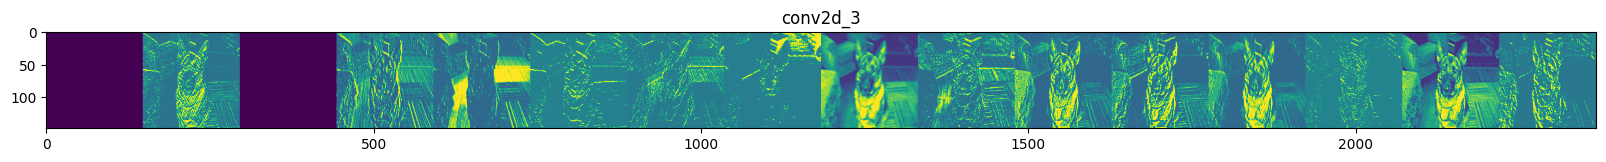

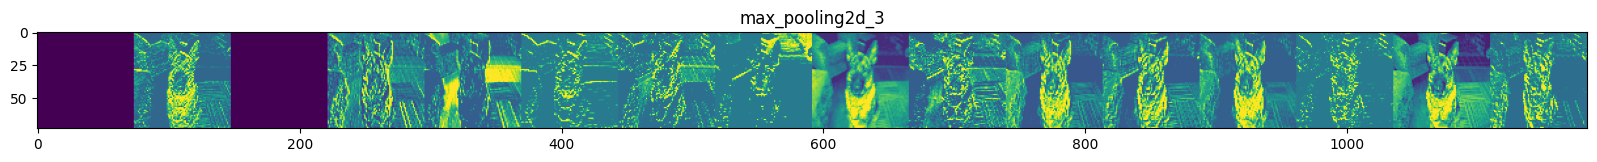

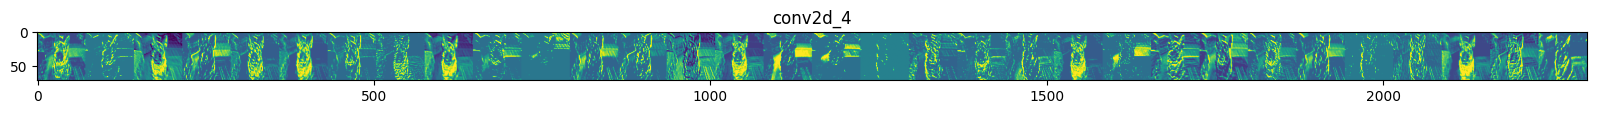

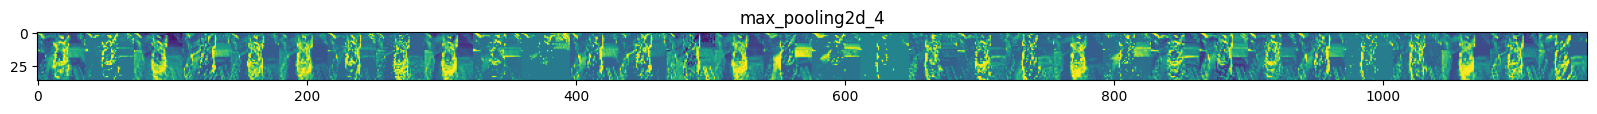

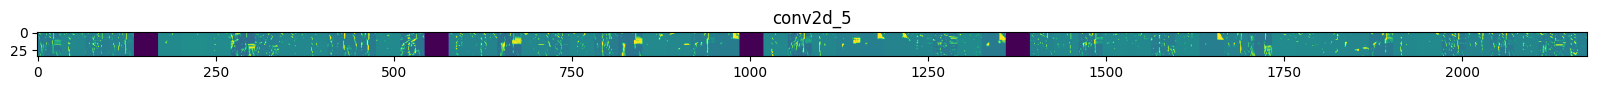

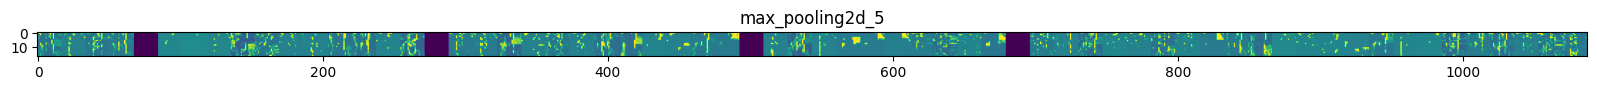

In [54]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

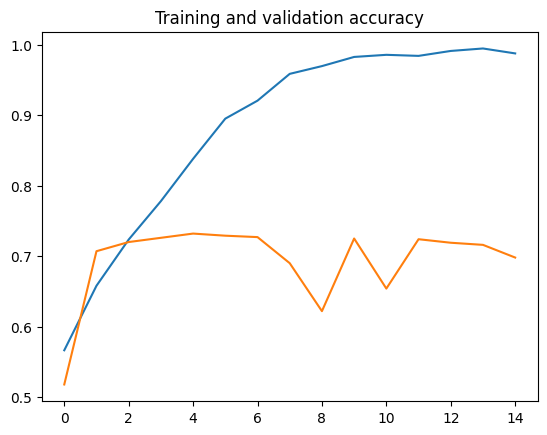

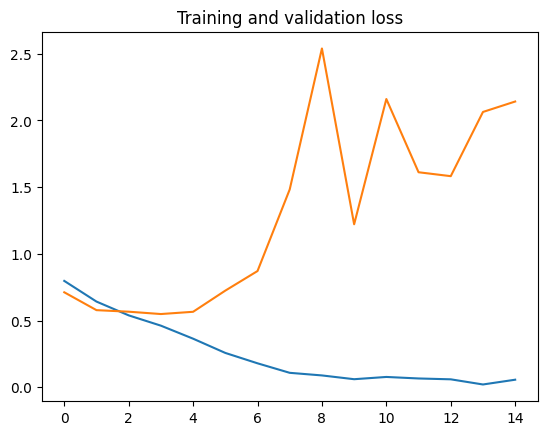

In [57]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
import os, signal

os.kill(os.getpid(), signal.SIGKILL)